In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
import os, pickle

from utils import config, DataGenerator, visualization

In [2]:
# trained_model_dir = "trained_models/res4.0-lr0.001-flt32-eph24/"
trained_model_dir = config.TRAINED_MODEL_DIR


In [3]:
model = load_model(f"{trained_model_dir}/trained-iou53.h5")

In [4]:
with open(f"{trained_model_dir}/training-history.pkl", 'rb') as file:
    training = pickle.load(file)

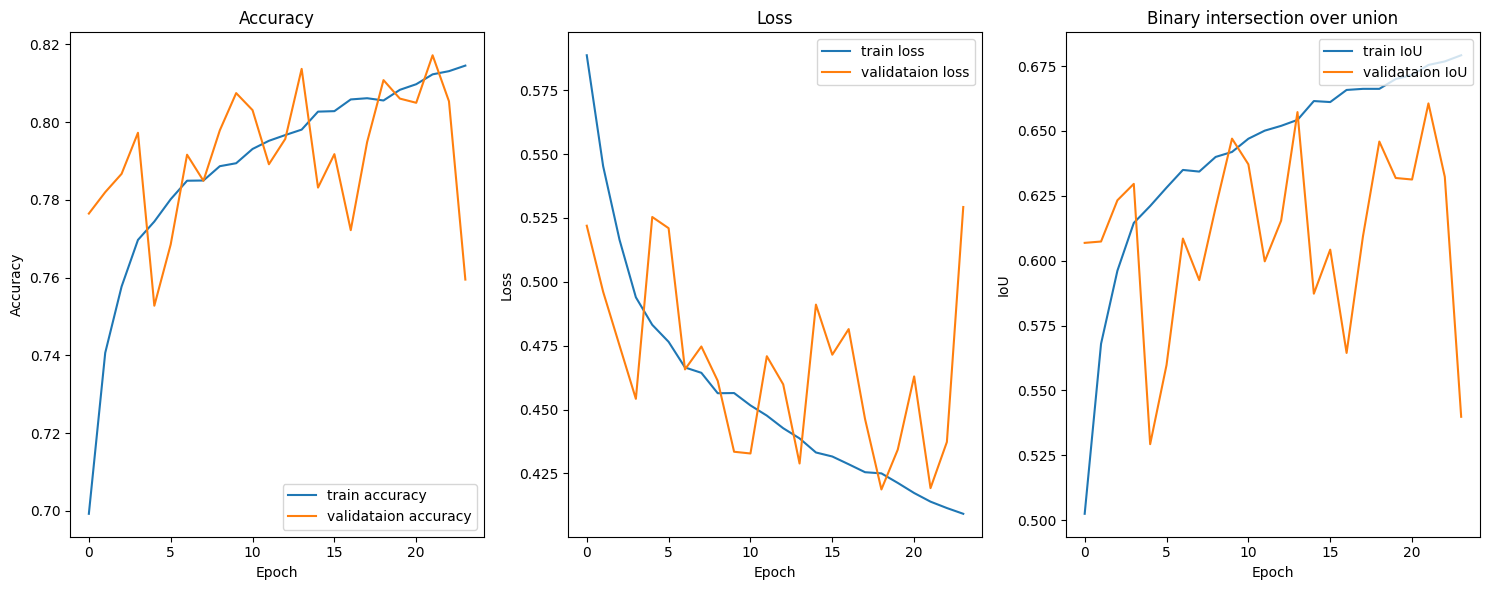

In [5]:
visualization.display_learning_curves(training, figsize=(15, 6))

In [6]:
batch_size = 64

In [7]:
def load_data():
    masks_dir = os.path.join(config.DATASET_DIR, "masks")
    images_dir = os.path.join(config.DATASET_DIR, "images")

    data_gen = DataGenerator.DataGenerator(images_dir, masks_dir, image_size=(64, 64))
    return data_gen

In [8]:
data_gen = load_data()


test_batches = data_gen.test_dataset.cache().batch(batch_size)
test_batches = test_batches.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

Found 5108 images.
4086 of them are in train set, and the rest 1022 are in the test set.
Default preprocessing mapped (resizing, loading)


2/2 [==============================] - 1s 335ms/step


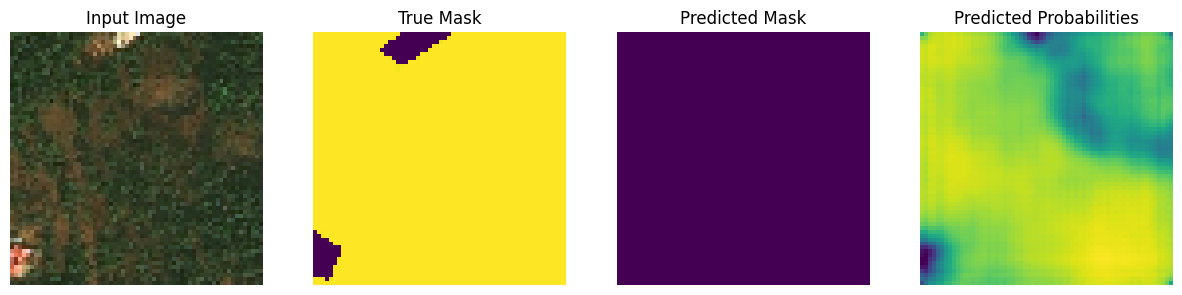

In [15]:
threshold = 0.5

index = np.random.randint(batch_size)
sample_batch = next(iter(test_batches))

sample_mask = sample_batch[1][index]
sample_image = sample_batch[0][index]

y_pred = model.predict(sample_batch[0])

pred_prob = y_pred[index]
pred_mask = (pred_prob > threshold).astype(int)


visualization.display([sample_image, sample_mask, pred_mask, pred_prob])